**BY - Ravindra Singh**

**ID - 225169385**

## Introduction/abstract of the task:
    
The rapid expansion of the urban housing market in Melbourne has made real estate forecasting an essential tool for investors, homebuyers, and policy makers. This project aims to develop an intelligent housing price prediction system using real-world data sourced from realestate.com.au, focusing on three desirable suburbs in Melbourne. The primary objective is to analyze housing price determinants and build accurate regression models capable of estimating property prices based on various features.

The workflow begins with data acquisition, where a dataset of at least 150 property listings (50 per suburb) is curated, including features such as property type, number of bedrooms/bathrooms, land size, location, and sale date, with sold price as the target variable.

Subsequently, a thorough data preprocessing and exploratory data analysis (EDA) phase is conducted. This includes encoding categorical variables, engineering new features like proximity to amenities (e.g., number of nearby schools), normalizing numerical values, and visualizing patterns such as price distributions, time trends, and correlations. Outlier detection and trend analysis across suburbs are also performed to enrich data understanding.

The core of the project involves developing and evaluating multiple regression models, including at least three diverse algorithms such as Linear Regression, Random Forest, and XGBoost. Evaluation is carried out using cross-validation and metrics like MAE, RMSE, and R-squared to ensure model robustness and generalizability.

To deepen the insights, feature importance analysis is performed using model-specific techniques and statistical tools like SHAP values to determine the most influential factors affecting housing prices.

Finally, a web-based deployment is created using Streamlit or Gradio, offering an interactive interface where users can input property details and receive real-time price predictions. This end-to-end solution not only serves as a predictive tool but also as a practical demonstration of how data science can address real-world real estate challenges.

## Goal of the Task:
**Required to develop a machine learning solution that predicts housing prices in Melbourne using real-world data.**

**Steps:**

- Collect your own dataset from a real estate website
- Clean and analyze the data
- Build and compare machine learning models
- Evaluate their accuracy
- Identify important factors influencing prices
- Deploy the best model in a small web application

## Import Required Libraries

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
import requests
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import joblib
import pickle

**Summary: Imported all necessary libraries for data loading, handling missing values, and visualization.**

## 1. Melbourne Housing Data acquisition:

**Objective:**

The objective of this activity is to collect real estate data from Melbourne, focusing on the top three suburbs where I would consider living. This data will be used for building regression models to predict housing prices. The aim is to explore and analyze the property market, understand key factors influencing property prices, and prepare a dataset suitable for machine learning tasks. The target variable for prediction is the sold price of each property.

**Suburbs Selected:**
    
For this activity, I have selected the following three Melbourne suburbs based on personal preference, popularity, and diversity in housing types:

- Brighton (61 properties)
- Richmond (60 properties)
- Preston  (57 properties)

**Data Collection Process:**
The data was manually collected from https://www.realestate.com.au by browsing recently sold properties in the selected suburbs. For each listing, the following details were extracted where available:

- **Suburb** - (Brighton, Richmond, Preston)
- **Address** - Address of the property 
- **Rooms** - Number of Rooms
- **Type** - Property type (House, Unit, Townhouse, Appartment)
- **Method** - Sold
- **SellerG** - SellerG name 
- **Date** - Date sold
- **Distance** - Distance in KM from CBD(KM)
- **Postcode** - Area postcode        
- **Bedroom** - Number of bedrooms
- **Bathroom** - Number of bathrooms
- **Car** - Number of car spaces
- **Landsize** - in m²
- **CouncilArea** - CouncilArea of the property
- **Latitude** - Latitude of property
- **Longitude** - Longitude of property
- **Regionname** - Regionname of property
- **Price** - Sold price in AUD (target variable)

The data was saved into a .csv file for easy loading and further processing using Python.

### Load the Dataset:

In [3]:
# Load the .CSV file "melbourne_housing_sold_data_3sub.csv" and store in dataframe for processing.
housing_df = pd.read_csv('melbourne_housing_sold_data_3sub.csv')

In [4]:
# Get the count of properties for each suburb
suburb_counts = housing_df['Suburb'].value_counts()

# Print the result
print("Property Count per Suburb:")
print(suburb_counts)

Property Count per Suburb:
Brighton     61
Richmond     60
Preston      57
Name: Suburb, dtype: int64


In [5]:
# Display the first few rows to verify successful loading
housing_df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,CouncilArea,Latitude,Longitude,Regionname,Price
0,Brighton,55 Cole Street,4,House,Sold,OBrien – Brighton (Robert Eierweis),05/03/25,10.99,3186,4,2,3,386,City of Bayside,–37.9090,144.996000,Bayside,"$2,801,000"
1,Brighton,9A Stanley Street,4,Townhouse,Sold,Kay & Burton,28/02/25,10.99,3186,4,2,2,406,City of Bayside,–37.9090,144.996000,Bayside,"$2,658,000"
2,Brighton,105/116 Martin Street,2,Apartment,Sold,Bush Blocks and Buildings (Ian Riley),05/12/24,10.99,3186,2,2,1,75,City of Bayside,–37.9090,144.996000,Bayside,"$652,000"
3,Brighton,10 Carpenter Street,4,House,Sold,Buxton,27/11/24,10.99,3186,4,1,2,508,City of Bayside,–37.9090,144.996000,Bayside,"$2,450,000"
4,Brighton,1A Beach Road,2,Unit,Sold,Zed Real Estate,01/03/25,11.34,3186,2,2,1,200,City of Bayside,-37.91345679,144.989124,Bayside,"$1,500,000"


**Data is successfully loaded using pandas.read_csv() and previewed it.**

### Check Data Types and Basic Info:

In [6]:
# Overview of the dataset: column names, non-null count, and data types
housing_df.info

<bound method DataFrame.info of         Suburb                      Address  Rooms       Type Method  \
0    Brighton                55 Cole Street      4      House   Sold   
1    Brighton             9A Stanley Street      4  Townhouse   Sold   
2    Brighton         105/116 Martin Street      2  Apartment   Sold   
3    Brighton           10 Carpenter Street      4      House   Sold   
4    Brighton                 1A Beach Road      2       Unit   Sold   
..         ...                          ...    ...        ...    ...   
173    Preston   147 Cramer Street, Preston      2      House   Sold   
174    Preston    50 Harrow Street, Preston      3      House   Sold   
175    Preston            3 Kathleen Street      4      House   Sold   
176    Preston     170 Murray Road, Preston      3      House   Sold   
177    Preston  17 Reidford Avenue, Preston      3      House   Sold   

                                   SellerG      Date  Distance  Postcode  \
0      OBrien – Brighton (R

**Data has 178 rows and 18 columns.**

In [7]:
# Dataset shape and data types
print("Shape:", housing_df.shape)
print("\nData Types:\n", housing_df.dtypes)

Shape: (178, 18)

Data Types:
 Suburb          object
Address         object
Rooms            int64
Type            object
Method          object
SellerG         object
Date            object
Distance       float64
Postcode         int64
Bedroom          int64
Bathroom         int64
Car              int64
Landsize         int64
CouncilArea     object
Latitude        object
Longitude      float64
Regionname      object
Price           object
dtype: object


### Analysis:
- Target variable is 'Price', which indicates the sold price. Mapped to object and should be changed to int/float.
- Date variable is mapped to object, will change that ot date type later.
- Latitude and Longitude should be float. Will change them.
- Postcode as int doesnot make sense. Should be changed to catagorical.

### Check Number of Missing Entries in Each Feature:

In [8]:
# Identify features with missing values and display the count
print("Missing values per column:")
print(housing_df.isnull().sum())

Missing values per column:
Suburb         0
Address        0
Rooms          0
Type           0
Method         0
SellerG        0
Date           0
Distance       0
Postcode       0
Bedroom        0
Bathroom       0
Car            0
Landsize       0
CouncilArea    0
Latitude       0
Longitude      0
Regionname     0
Price          0
dtype: int64


**Dataset has no missing values as its manually taken from website.**

### Map/Change the datatype properly for 'Price' (target variable):

In [9]:
# Check the first few entries in the Price column
print(housing_df['Price'].head())

0    $2,801,000
1    $2,658,000
2      $652,000
3    $2,450,000
4    $1,500,000
Name: Price, dtype: object


**Remove dollar signs and commas.Convert to numeric, and handle errors. Also confirm.**

In [10]:
housing_df['Price'] = housing_df['Price'].replace('[\$,]', '', regex=True)
housing_df['Price'] = pd.to_numeric(housing_df['Price'], errors='coerce')

### Change the datatype of Latitude and Longitude to float from object:

In [11]:
# Replace en dash (–) with hyphen-minus (-) in both Latitude and Longitude
housing_df['Latitude'] = housing_df['Latitude'].astype(str).str.replace('–', '-', regex=False)
housing_df['Longitude'] = housing_df['Longitude'].astype(str).str.replace('–', '-', regex=False)

# Convert to float (handle any non-numeric entries with errors='coerce')
housing_df['Latitude'] = pd.to_numeric(housing_df['Latitude'], errors='coerce')
housing_df['Longitude'] = pd.to_numeric(housing_df['Longitude'], errors='coerce')

### Convert Postcode to object:

In [12]:
# Convert Postcode to object.
housing_df['Postcode'] = housing_df['Postcode'].astype('object')

In [13]:
# Dataset shape and data types
print("Shape:", housing_df.shape)
print("\nData Types:\n", housing_df.dtypes)

Shape: (178, 18)

Data Types:
 Suburb          object
Address         object
Rooms            int64
Type            object
Method          object
SellerG         object
Date            object
Distance       float64
Postcode        object
Bedroom          int64
Bathroom         int64
Car              int64
Landsize         int64
CouncilArea     object
Latitude       float64
Longitude      float64
Regionname      object
Price            int64
dtype: object


**Datatype conversion:**
- **Price** converted to int.
- **Latitude** and **Longitude** converted to float.
- **Postcode** converted to object. 

In [14]:
# Calculate the five-point summary for all numeric columns
housing_df.describe()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,Latitude,Longitude,Price
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,3.078652,8.028567,3.078652,1.780899,1.674157,400.157303,-37.827964,145.000521,3.332893e+06
std,0.676059,3.567213,0.676059,0.639805,0.547728,161.285997,0.071574,0.010581,1.689242e+06
min,1.000000,2.664000,1.000000,1.000000,1.000000,54.000000,-37.917778,144.987433,1.810000e+05
25%,3.000000,3.338250,3.000000,1.000000,1.000000,280.000000,-37.912132,144.990840,1.850000e+06
50%,3.000000,9.500000,3.000000,2.000000,2.000000,423.500000,-37.825943,144.996901,3.050000e+06
75%,4.000000,11.305000,4.000000,2.000000,2.000000,540.000000,-37.742625,145.008450,4.837500e+06
max,4.000000,12.250000,4.000000,3.000000,3.000000,696.000000,-37.724700,145.029600,8.300000e+06


**Five point summary of data looks good.**

In [15]:
# Display the first few rows to verify successful loading
housing_df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,CouncilArea,Latitude,Longitude,Regionname,Price
0,Brighton,55 Cole Street,4,House,Sold,OBrien – Brighton (Robert Eierweis),05/03/25,10.99,3186,4,2,3,386,City of Bayside,-37.909000,144.996000,Bayside,2801000
1,Brighton,9A Stanley Street,4,Townhouse,Sold,Kay & Burton,28/02/25,10.99,3186,4,2,2,406,City of Bayside,-37.909000,144.996000,Bayside,2658000
2,Brighton,105/116 Martin Street,2,Apartment,Sold,Bush Blocks and Buildings (Ian Riley),05/12/24,10.99,3186,2,2,1,75,City of Bayside,-37.909000,144.996000,Bayside,652000
3,Brighton,10 Carpenter Street,4,House,Sold,Buxton,27/11/24,10.99,3186,4,1,2,508,City of Bayside,-37.909000,144.996000,Bayside,2450000
4,Brighton,1A Beach Road,2,Unit,Sold,Zed Real Estate,01/03/25,11.34,3186,2,2,1,200,City of Bayside,-37.913457,144.989124,Bayside,1500000


## Visualize data:

### Univariate Analysis:

### Distribution of Property Prices:

**Purpose:** This histogram and Kernel Density Estimate (KDE) plot helps to understand the central tendency, spread, shape, and presence of outliers in the 'Price' (target) variable. It shows how property prices are distributed across the selected suburbs.

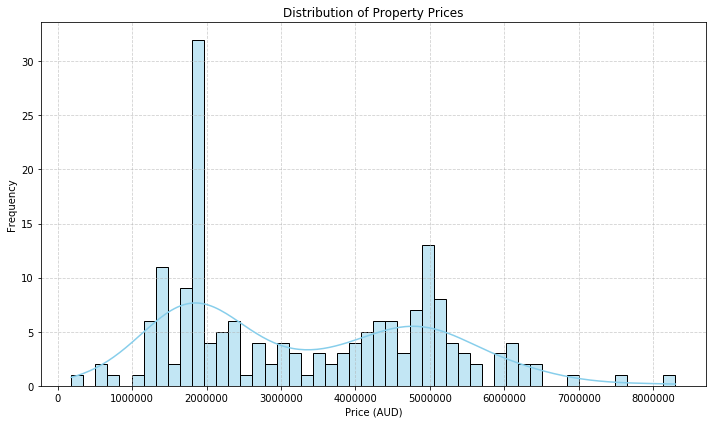

In [16]:
# 1. Distribution of 'Price' (Target Variable)
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['Price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (AUD)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:

The histogram clearly shows that the distribution of property prices is highly right-skewed. This means that a large number of properties are sold at lower prices, while a much smaller number of properties command significantly higher prices.

The peak of the distribution is towards the lower end of the price range, indicating that most properties in this dataset are relatively affordable.

### Distribution of Number of Rooms:
**Purpose:** This bar plot illustrates the frequency of different numbers of rooms in properties within the dataset. It helps identify common property sizes in terms of room count.

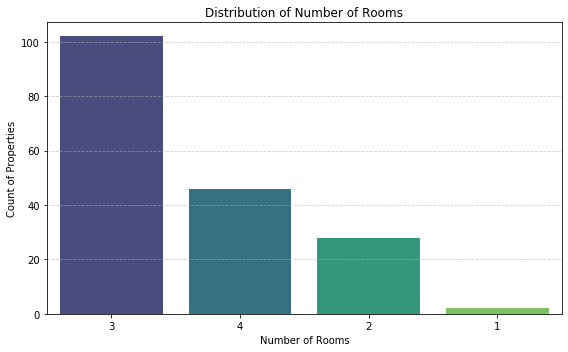

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=housing_df, x='Rooms', palette='viridis', order=housing_df['Rooms'].value_counts().index)
plt.title('Distribution of Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count of Properties')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:
The most common number of rooms for properties in this subset of Melbourne suburbs is 3 rooms, followed by 4 and then 2 rooms. There's a rapid decrease in frequency for properties with 2 rooms to 1, with very few properties having 1 rooms. This indicates that 2-4 bedroom properties are the most prevalent type in these suburbs.

### Distribution of Property Types:
**Purpose:** This bar plot shows the prevalence of different property types (e.g., House, Unit, Townhouse) in the dataset. It gives an idea of the most common housing structures available.

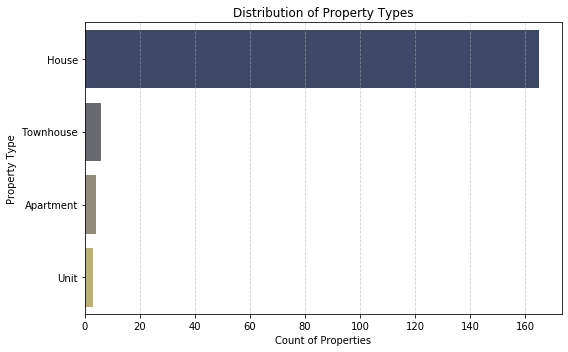

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=housing_df, y='Type', palette='cividis', order=housing_df['Type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count of Properties')
plt.ylabel('Property Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:
The majority of properties in this dataset are Houses (h), followed by very less in Townhouses (t), Appartments (a), and then a smaller number of Units (u). This suggests that houses are the dominant property type for sale in the chosen suburbs, which could influence overall market dynamics.

### Bivariate Analysis:

Bivariate graphs are used to explore the relationship between two variables, helping to identify patterns, correlations, and differences.

### Price vs. Landsize:
**Purpose:** This scatter plot explores the relationship between the 'Price' of a property and its 'Landsize'. We expect to see if larger land sizes generally correlate with higher prices, indicating a positive linear or non-linear relationship.

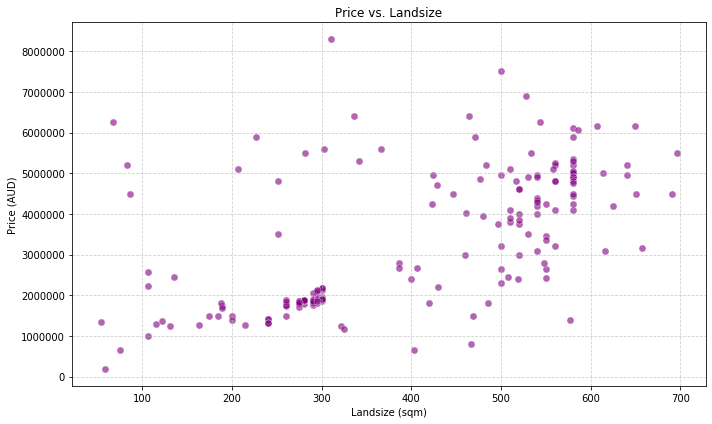

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_df, x='Landsize', y='Price', alpha=0.6, color='purple', s=50) # s controls marker size
plt.title('Price vs. Landsize')
plt.xlabel('Landsize (sqm)')
plt.ylabel('Price (AUD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:
The scatter plot suggests a positive correlation between Price and Landsize. As Landsize increases, the Price generally tends to increase as well. However, the relationship isn't perfectly linear; there's a significant spread in prices for similar land sizes, especially at smaller land sizes. This indicates that Landsize is an important factor, but other variables also play a crucial role in determining property prices. There might also be some outliers with very large land sizes or very high prices.

### Price vs. Number of Rooms:
**Purpose:** This box plot visualizes how the 'Price' distribution varies with the 'Number of Rooms'. It helps to see if properties with more rooms tend to have higher prices and to observe the spread and outliers for each room count category.

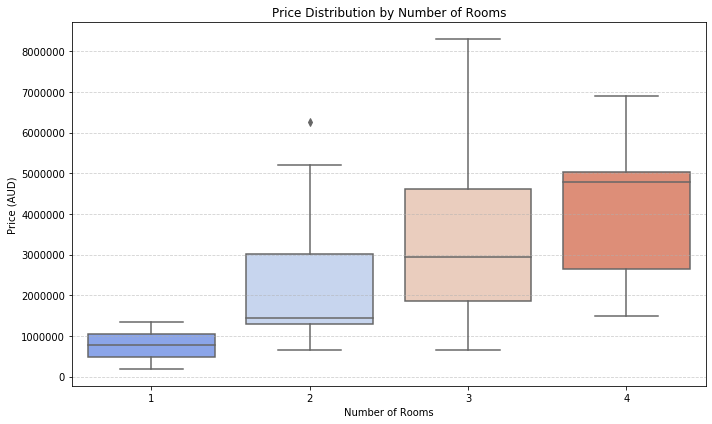

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_df, x='Rooms', y='Price', palette='coolwarm')
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (AUD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:
This box plot clearly shows a general trend of increasing median price with an increasing number of rooms. Properties with more rooms (e.g., 3-4 rooms) tend to command higher prices. The spread (interquartile range, represented by the box) also appears to widen for properties with more rooms, indicating greater variability in price within those categories. The presence of outliers (individual points outside the "whiskers") suggests some unusually expensive or inexpensive properties for a given number of rooms.

### Price vs. Suburb:
**Purpose:** This violin plot shows the distribution of 'Price' for each of the top three chosen suburbs. It helps to compare the price ranges, median prices, and overall density of prices across different locations, highlighting potential differences in property values based on suburb.

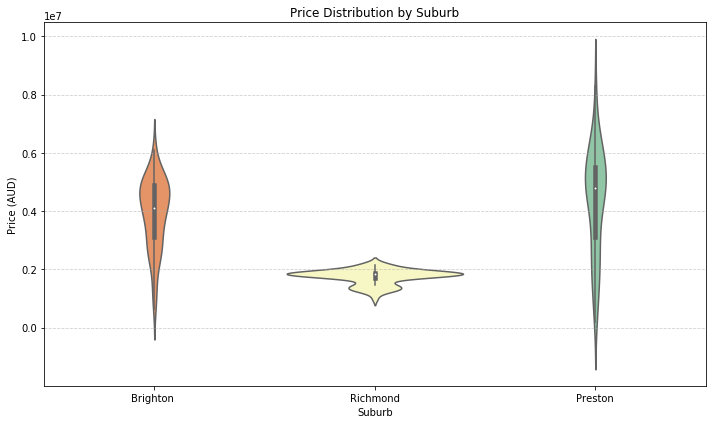

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=housing_df, x='Suburb', y='Price', palette='Spectral')
plt.title('Price Distribution by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Price (AUD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Analysis:
The violin plot effectively highlights the differences in property prices across the selected suburbs:

- Brighton clearly has the highest median prices and the widest range, indicating a more affluent market with very expensive properties. Its distribution is denser at the higher end.
- Preston shows a moderate price range with a concentration of properties in the mid-range, suggesting it's a competitive inner-city market. Its distribution is thinner at the higher end.
- Richmond has the lowest median prices and a tighter, lower price range, indicating it's a relatively more affordable suburb compared to Brighton and Richmond within this dataset.

This plot is crucial as it demonstrates that location (Suburb) is a very strong determinant of property price, exhibiting distinct market behaviors for each area.

### Correlation Heatmap (Numerical Only):
**Purpose:**
Understanding correlation is fundamental in data analysis for several key reasons:
- Understanding Relationships: It helps to quickly grasp how two variables move together.
- Feature Selection for Machine Learning.
- Done on numerical fields only. Drop "Postcode" as its not useful in visualization as well as in model.

In [22]:
# Drop the 'Postcode' column
if 'Postcode' in housing_df.columns:
    housing_df_modified = housing_df.drop(columns=['Postcode'])
    print(f"Successfully dropped 'Postcode' column. New dataset shape: {housing_df_modified.shape}")
else:
    housing_df_modified = housing_df.copy() # Make a copy if 'Postcode' isn't found
    print("'Postcode' column not found in the dataset. Proceeding with original DataFrame.")

Successfully dropped 'Postcode' column. New dataset shape: (178, 17)


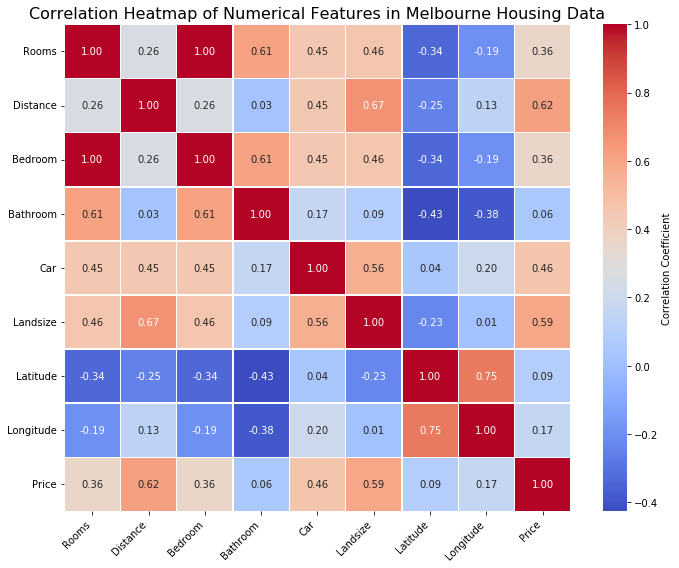

In [23]:
# The .corr() method only works on numerical data.
numerical_df = housing_df_modified.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(
    correlation_matrix,
    annot=True,       # Show the correlation values on the heatmap
    cmap='coolwarm',  # Color map (coolwarm is good for showing positive/negative correlations)
    fmt=".2f",        # Format annotations to two decimal places
    linewidths=.5,    # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'} # Add a label to the color bar
)
plt.title('Correlation Heatmap of Numerical Features in Melbourne Housing Data', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Analysis:
Based on the correlation heatmap, observations are as following:

**Correlations with 'Price' (Target Variable)**

**Strong Positive Correlations:**

Distance (0.62): This is the strongest positive relationship, meaning Distance from CBD plays a major role.

Landsize (0.59): A strong positive correlation with price. It indicates that properties with a higher Landsize generally command significantly higher prices.

**Moderate Positive Correlations:**

Car (0.46): A moderate positive relationship, meaning more Car are typically associated with higher values.

Rooms/Bedroom (0.36): A moderate positive relationship, meaning more Rooms and Bedrooms are typically associated with higher property values.

**High Multicollinearity:**

Rooms, Bedroom, and Bathroom: These features are highly positively correlated with each other.

## 2. Data preprocessing and exploratory data analysis:

### Create a copy and drop un-useful/noisy columns: 

In [24]:
# Create a copy of the original DataFrame
housing_df_cleaned = housing_df.copy()

# Drop the specified columns from the copy
housing_df_cleaned.drop(['Address', 'Method'], axis=1, inplace=True)

### A. One-Hot Encode Categorical Variables:

### Purpose:
Encode categorical variables (e.g., 'Property Type', 'Suburb') using one-hot encoding to make them suitable for regression models.

- Extract 'Year' and 'Month' from the 'Date' column for temporal analysis.
- Perform one-hot encoding on all relevant low-cardinality categorical columns.

In [25]:
# Extract Year and Month from 'Date'
housing_df_cleaned['Date'] = pd.to_datetime(housing_df_cleaned['Date'], errors='coerce')  # Ensure date format is parsed
housing_df_cleaned['SaleYear'] = housing_df_cleaned['Date'].dt.year
housing_df_cleaned['SaleMonth'] = housing_df_cleaned['Date'].dt.month

#Drop columns that are noisy, redundant, or too specific
housing_df_cleaned.drop(['Date'], axis=1, inplace=True)

# Clean 'SellerG' (group low-frequency categories into 'Other')
top_sellers = housing_df_cleaned['SellerG'].value_counts().nlargest(10).index
housing_df_cleaned['SellerG'] = housing_df_cleaned['SellerG'].apply(lambda x: x if x in top_sellers else 'Other')

In [26]:
# List of categorical variables to one-hot encode
categorical_cols = ['Suburb', 'Type', 'SellerG', 'CouncilArea', 'Regionname', 'Postcode']

# One-hot encode (drop_first=True avoids multicollinearity)
housing_df_encoded = pd.get_dummies(housing_df_cleaned, columns=categorical_cols, drop_first=True)

# Reset index
housing_df_encoded.reset_index(drop=True, inplace=True)

### Analysis:
- SaleYear and SaleMonth are extracted from the Date column, enabling temporal trend analysis or seasonal insights.

- One-hot encoding is used on 6 categorical columns (Suburb, Type, SellerG, CouncilArea, Regionname, and Postcode). This converts categories into machine-learning-friendly numeric format.

- We used drop_first=True to avoid dummy variable trap (perfect multicollinearity), which is good practice especially when using linear models.

- For SellerG, we limited to the top 10 sellers and grouped others under 'other' to reduce dimensionality and noise.

In [27]:
# Display the first few rows and check
housing_df_encoded.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,Latitude,Longitude,Price,SaleYear,...,CouncilArea_Bayside City,CouncilArea_City of Bayside,CouncilArea_City of Yarra,CouncilArea_Darebin (C),Regionname_Inner Melbourne,Regionname_Inner South,Regionname_Melbourne - North,Regionname_Yarra,Postcode_3121,Postcode_3186
0,4,10.99,4,2,3,386,-37.909000,144.996000,2801000,2025,...,0,1,0,0,0,0,0,0,0,1
1,4,10.99,4,2,2,406,-37.909000,144.996000,2658000,2025,...,0,1,0,0,0,0,0,0,0,1
2,2,10.99,2,2,1,75,-37.909000,144.996000,652000,2024,...,0,1,0,0,0,0,0,0,0,1
3,4,10.99,4,1,2,508,-37.909000,144.996000,2450000,2024,...,0,1,0,0,0,0,0,0,0,1
4,2,11.34,2,2,1,200,-37.913457,144.989124,1500000,2025,...,0,1,0,0,0,0,0,0,0,1


**Now we have 36 columns now after one-hot encoding.**

### B. Create New Features:

**Purpose:**
Create additional meaningful features that may influence price (e.g., proximity to schools, Price per Sqr meter, etc.)

### School Nearby:

**Purpose:**
Query the number of schools within a radius (1 km) for each property using OpenStreetMap.

In [28]:
# Latitude and Longitude of each house
properties = housing_df_encoded[['Latitude', 'Longitude']].copy()
properties.columns = ['lat', 'lon']  # rename for consistency

# Helper function to query OSM Overpass API for nearby schools
def count_schools_nearby(lat, lon, radius=1000):
    query = f"""
    [out:json];
    (
      node["amenity"="school"](around:{radius},{lat},{lon});
      way["amenity"="school"](around:{radius},{lat},{lon});
      relation["amenity"="school"](around:{radius},{lat},{lon});
    );
    out count;
    """
    url = "http://overpass-api.de/api/interpreter"
    try:
        response = requests.post(url, data=query, timeout=30)
        data = response.json()
        return data['elements'][0]['tags']['total'] if data['elements'] else 0
    except:
        return 0  # fail gracefully

# Apply to each row with a progress bar
tqdm.pandas()
housing_df_encoded['schools_nearby'] = properties.progress_apply(
    lambda row: count_schools_nearby(row['lat'], row['lon']), axis=1
)

100%|████████████████████████████████████████████████████████████████████████████████| 178/178 [02:46<00:00,  1.07it/s]


### Analysis:
This feature quantifies educational access a strong influence on property value. Properties with more nearby schools often attract families and demand higher prices. Including this as a numeric feature enhances model accuracy, especially in suburban regions.

### Create Price Per Square Meter:

**Purpose:**
Check 'Landsize' and create this feature.

In [29]:
# Create 'PricePerSqMeter'
# Handle cases where 'Landsize' might be zero or NaN to avoid division by zero
housing_df_encoded['PricePerSqMeter'] = housing_df_encoded.apply(lambda row: row['Price'] / row['Landsize'] if row['Landsize'] > 0 else np.nan, axis=1)

### Analysis:
This feature will tell the average SQRMT value of property. Properties with more amenities and close to centre often attract families and demand higher prices. Including this as a numeric feature enhances model accuracy, especially in suburban regions.

In [30]:
# Check the dataframe
housing_df_encoded.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,Latitude,Longitude,Price,SaleYear,...,CouncilArea_City of Yarra,CouncilArea_Darebin (C),Regionname_Inner Melbourne,Regionname_Inner South,Regionname_Melbourne - North,Regionname_Yarra,Postcode_3121,Postcode_3186,schools_nearby,PricePerSqMeter
0,4,10.99,4,2,3,386,-37.909000,144.996000,2801000,2025,...,0,0,0,0,0,0,0,1,3,7256.476684
1,4,10.99,4,2,2,406,-37.909000,144.996000,2658000,2025,...,0,0,0,0,0,0,0,1,3,6546.798030
2,2,10.99,2,2,1,75,-37.909000,144.996000,652000,2024,...,0,0,0,0,0,0,0,1,3,8693.333333
3,4,10.99,4,1,2,508,-37.909000,144.996000,2450000,2024,...,0,0,0,0,0,0,0,1,3,4822.834646
4,2,11.34,2,2,1,200,-37.913457,144.989124,1500000,2025,...,0,0,0,0,0,0,0,1,3,7500.000000


**We have 38 columns now after adding 2 new features.**

### C. Normalize or standardize numerical features:

**Purpose:**
 Normalize or standardize numerical features so that they have a similar scale, improving model performance (especially for distance-based models or regularized regressions).

In [31]:
housing_df_encoded.dtypes

Rooms                             int64
Distance                        float64
Bedroom                           int64
Bathroom                          int64
Car                               int64
Landsize                          int64
Latitude                        float64
Longitude                       float64
Price                             int64
SaleYear                          int64
SaleMonth                         int64
Suburb_Preston                    uint8
Suburb_Richmond                   uint8
Type_House                        uint8
Type_Townhouse                    uint8
Type_Unit                         uint8
SellerG_Belle Property            uint8
SellerG_Biggin Scott              uint8
SellerG_Buxton                    uint8
SellerG_Hockingstuart             uint8
SellerG_Jellis Craig              uint8
SellerG_Marshall White            uint8
SellerG_Nelson Alexander          uint8
SellerG_Other                     uint8
SellerG_Raywhite                  uint8


In [32]:
# Selecting numerical columns needs to normalize
numeric_cols = ['Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Latitude', 
                'Longitude','schools_nearby', 'PricePerSqMeter']

scaler = StandardScaler()
housing_df_encoded[numeric_cols] = scaler.fit_transform(housing_df_encoded[numeric_cols])

### Analysis:
Standardization centres features around zero with unit variance. This ensures that features like Landsize,  PricePerSqMeter, Distance etc. don't dominate others due to their magnitude.

Scaling numerical features is important for many machine learning algorithms to prevent features with larger ranges from dominating the learning process.

### Why we normalize all the numerical fields?

All the numerical fields would generally benefit from normalization. Here's why and some specific considerations:

**Landsize:** This is a prime candidate for scaling. Land sizes can vary significantly (e.g., from tens to thousands of square meters), so scaling will prevent it from disproportionately influencing distance-based calculations or model weights.

**PricePerSqMeter:** Similar to Landsize, this derived metric can have a wide range of values. Scaling is highly recommended to bring it to a comparable scale with other features.

**Distance**: This is a continuous variable that can span a considerable range. Scaling will ensure its magnitude doesn't overshadow other features.

**Rooms, Bedroom, Bathroom, Car:** While these are integer counts and might have smaller ranges compared to Landsize or PricepersqMtr, their scales are still different from each other and from the larger-range variables. For instance, a property might have 2 bathrooms but a land size of 500 square meters. Scaling these features helps ensure that a difference of 1 room is treated proportionally to a difference in another scaled feature.

**Latitude, Longitude:** These are geographical coordinates. Although their ranges are often relatively small (a few degrees), scaling them can still be beneficial. For instance, in distance-based algorithms, small differences in coordinates should be given appropriate weight relative to other features.

**schools_nearby:** Depending on whether this represents a count, its range could vary. If it's a count that can be large, scaling would be important.

### D. Visualize of housing data:

### Visualize Housing Price Distribution:
**Purpose:**

Understand the distribution of housing prices to check for skewness, peaks, or anomalies.

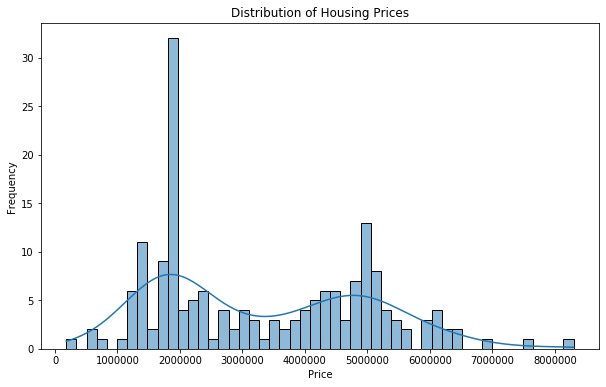

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_df_encoded['Price'], bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Analysis:
The histogram clearly shows that the distribution of property prices is highly right-skewed. This means that a large number of properties are sold at lower prices, while a much smaller number of properties command significantly higher prices.

The peak of the distribution is towards the lower end of the price range, indicating that most properties in this dataset are relatively affordable.

### Correlation Heatmap (Feature-to-Target):

**Purpose:**

Visualize the correlation between features and the target variable (`Price`) to identify strong predictors.

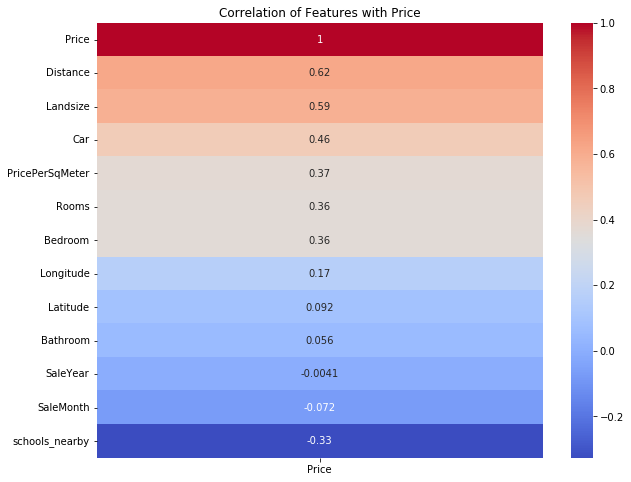

In [34]:
# # Correlation Heatmap with only numeric features
numeric_df = housing_df_encoded.select_dtypes(include=['int64', 'float64'])

# Compute correlation with Price
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Price')
plt.show()

### Analysis:
Based on the correlation heatmap, observations are as following:

**Correlations with 'Price' (Target Variable)**

**Strong Positive Correlations:**

Distance (0.62): This is the strongest positive relationship, meaning Distance from CBD plays a major role.

Landsize (0.59): A strong positive correlation with price. It indicates that properties with a higher Landsize generally command significantly higher prices.

**Moderate Positive Correlations:**

Car (0.46): A modarate positive relationship, meaning more Car are typically associated with higher values.

PricePerSqMeter (0.37): A modarate positive relationship, meaning higher property values.

Rooms/Bedroom (0.36): A modarate positive relationship, meaning more Rooms and Bedrooms are typically associated with higher property values.

**High Multicollinearity:**

Rooms, Bedroom: These features are highly positively correlated with each other.

### Outliers Detection:

**Purpose:**
    
Identify outliers in numeric features using boxplots.

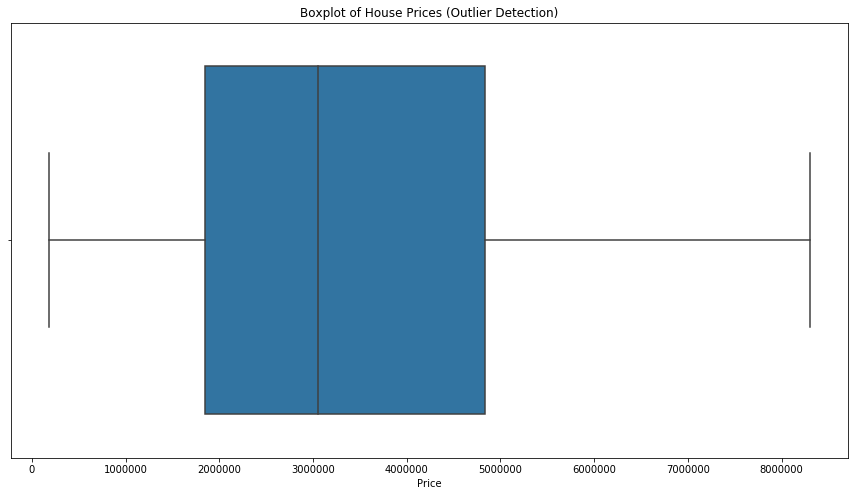

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=housing_df_encoded['Price'])
plt.title('Boxplot of House Prices (Outlier Detection)')
plt.show()

### Analysis:
The boxplot identifies extreme values (outliers) in the price distribution. These outliers can distort model training. Didn't observe any outlier though it has a long whisker.

### E. Price Trend Over Time by Suburb:

**Purpose:**

Analyze price trends over time across different suburbs to detect market behaviour and seasonal fluctuations.

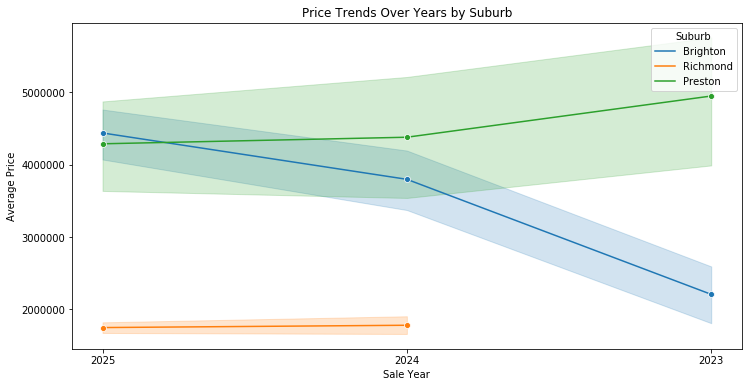

In [36]:
# Convert SaleYear to string for plotting
housing_df['SaleYear_str'] = housing_df_encoded['SaleYear'].astype(str)

# Now plot with SaleYear_str
plt.figure(figsize=(12, 6))
sns.lineplot(data=housing_df, x='SaleYear_str', y='Price', hue='Suburb', marker='o')
plt.title('Price Trends Over Years by Suburb')
plt.ylabel('Average Price')
plt.xlabel('Sale Year')
plt.legend(title='Suburb')
plt.show()

### Analysis:
This visualization highlights whether prices in selected suburbs are increasing, stable, or volatile. Upward trends suggest strong growth suburbs, while flat or declining trends might imply saturation or lower demand.

**Brighton** Suburb **Price** has gone up significantly whereas in **Preston** has gone down year-on-year basis. **Richmond** Price is very much stable.

## 3. Model Development and Evaluation:

**Purpose:**

Developed and evaluated three best regression models: **Linear Regression**, **Random Forest Regressor**, and **Gradient Boosting Regressor**. We use k-fold cross-validation to assess their performance robustly, mitigating bias from a single train-test split. The evaluation metrics used are Mean Absolute Error **(MAE)**, Root Mean Squared Error **(RMSE)**, and R-squared **(R^2)**.

### Data Preparation: Splitting Features and Target:

**Purpose:**

To separate the preprocessed dataframe into independent variables (features) and the dependent variable (target). This is a crucial first step before training any machine learning model.

In [37]:
# housing_df_encoded dataframe is aready for use
X = housing_df_encoded.drop(columns=['Price'])
y = housing_df_encoded['Price']

**X is feature and y is target variable.**

### Model Definition and K-Fold Cross-Validation:

**Purpose:**

Define and evaluate multiple regression models using k-fold cross-validation.

In [38]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Define k-fold cross-validation
n_splits = 5 # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

### Analysis: 

This section sets up a robust evaluation framework. K-Fold is used to split the data into training and testing sets multiple times,ensuring that the model's performance is not overly dependent on a single train-test split.

Linear Regression, Random Forest, and Gradient Boosting are chosen for their distinct characteristics and common use in regression tasks.

MAE, RMSE, and R-squared are calculated for each fold to provide a comprehensive view of model accuracy, error magnitude, and explanatory power.

### Model Training and Evaluation:

**Purpose:**

To train each selected model within the k-fold cross-validation framework and calculate the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R^2) for each fold.

In [39]:
results = {} # Dictionary to store performance metrics for each model
for name, model in models.items():
    mae_scores = []
    rmse_scores = []
    r2_scores = []

    print(f"\n--- Evaluating {name.replace('_', ' ')} ---")
    
    # Training with K-Fold
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        print(f"Fold {fold+1}: MAE={mae:.2f}, RMSE={rmse:.2f}, R-squared={r2:.2f}")

    results[name] = {
        'MAE_mean': np.mean(mae_scores),
        'MAE_std': np.std(mae_scores),
        'RMSE_mean': np.mean(rmse_scores),
        'RMSE_std': np.std(rmse_scores),
        'R2_mean': np.mean(r2_scores),
        'R2_std': np.std(r2_scores)
    }

    print(f"  Average {name.replace('_', ' ')} Performance:")
    print(f"  Mean MAE: {results[name]['MAE_mean']:.2f} (Std: {results[name]['MAE_std']:.2f})")
    print(f"  Mean RMSE: {results[name]['RMSE_mean']:.2f} (Std: {results[name]['RMSE_std']:.2f})")
    print(f"  Mean R-squared: {results[name]['R2_mean']:.2f} (Std: {results[name]['R2_std']:.2f})")


--- Evaluating Linear Regression ---
Fold 1: MAE=661782.26, RMSE=961488.34, R-squared=0.69
Fold 2: MAE=811205.35, RMSE=1869794.32, R-squared=-0.17
Fold 3: MAE=806681.72, RMSE=1122957.25, R-squared=0.59
Fold 4: MAE=800056.85, RMSE=1078068.98, R-squared=0.60
Fold 5: MAE=406714.87, RMSE=567557.68, R-squared=0.85
  Average Linear Regression Performance:
  Mean MAE: 697288.21 (Std: 155691.35)
  Mean RMSE: 1119973.31 (Std: 422912.98)
  Mean R-squared: 0.51 (Std: 0.35)

--- Evaluating Random Forest Regressor ---
Fold 1: MAE=263918.61, RMSE=525121.19, R-squared=0.91
Fold 2: MAE=496643.89, RMSE=858465.48, R-squared=0.75
Fold 3: MAE=507719.72, RMSE=945628.70, R-squared=0.71
Fold 4: MAE=255282.86, RMSE=377603.09, R-squared=0.95
Fold 5: MAE=280593.71, RMSE=546389.69, R-squared=0.86
  Average Random Forest Regressor Performance:
  Mean MAE: 360831.76 (Std: 115751.36)
  Mean RMSE: 650641.63 (Std: 215119.51)
  Mean R-squared: 0.84 (Std: 0.09)

--- Evaluating Gradient Boosting Regressor ---
Fold 1: M

### Analysis:

- For each model, we iterate through the kf.split(X) to get the train and test indices for each fold.
- The data is then split into X_train, X_test, y_train, and y_test based on these indices.
- The model.fit(X_train, y_train) command trains the model on the training data.
- model.predict(X_test) generates predictions on the unseen test data for the current fold.
- MAE is calculated as the average of the absolute differences between predictions and actual values. It's easy to interpret and gives a clear picture of the average error magnitude.
- RMSE is the square root of the average of the squared differences. It penalizes larger errors more heavily than MAE, making it sensitive to outliers.
- R-squared (R^2) indicates the proportion of the variance in the target variable that is predictable from the independent variables. A higher R^2 indicates a better fit of the model to the data.
- The metrics for each fold are collected, and then the mean and standard deviation are computed across all folds. The mean gives the average performance, while the standard deviation indicates the consistency (or variability) of the model's performance across different data subsets.

### Final Model Comparison:

**Purpose:**

To present a clear summary of the average performance metrics for all evaluated models, enabling a direct comparison.

In [40]:
print("\n--- Final Model Comparison ---")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"  Mean MAE: {metrics['MAE_mean']:.2f} +/- {metrics['MAE_std']:.2f}")
    print(f"  Mean RMSE: {metrics['RMSE_mean']:.2f} +/- {metrics['RMSE_std']:.2f}")
    print(f"  Mean R-squared: {metrics['R2_mean']:.2f} +/- {metrics['R2_std']:.2f}")


--- Final Model Comparison ---

Model: Linear Regression
  Mean MAE: 697288.21 +/- 155691.35
  Mean RMSE: 1119973.31 +/- 422912.98
  Mean R-squared: 0.51 +/- 0.35

Model: Random Forest Regressor
  Mean MAE: 360831.76 +/- 115751.36
  Mean RMSE: 650641.63 +/- 215119.51
  Mean R-squared: 0.84 +/- 0.09

Model: Gradient Boosting Regressor
  Mean MAE: 269876.91 +/- 113731.32
  Mean RMSE: 485724.63 +/- 231400.74
  Mean R-squared: 0.90 +/- 0.09


### Analysis: 

This final summary allows for an easy comparison of the models' effectiveness. We look at the mean MAE, RMSE, and R^2 values, along with their standard deviations, to understand both average performance and consistency.

### Conclusion of Model Development:

**Based on the evaluation using 5-fold cross-validation:**

- **Linear Regression** showed an average R^2 of 0.51, with mean MAE of approximately ${$697,288}$ and RMSE of ${$1,119,973}$. While it provides a basic benchmark, its relatively lower accuracy and higher error suggest that it may not be the most reliable model for this task.

- **Random Forest Regressor** achieved a higher average R^2 of 0.84, with a significantly lower mean MAE of approximately ${$360,831}$ and RMSE of ${$650,641}$. This indicates that the Random Forest model is much better at capturing complex patterns in the data compared to Linear Regression.

- **Gradient Boosting Regressor** outperformed the other models, achieving the highest average R^2 of 0.90. It had lowest mean MAE of approximately ${$269,876}$ and RMSE of ${$485,724}$. This suggests that Gradient Boosting not only provides the most accurate predictions but also generalizes well to unseen data.

In summary, both Gradient Boosting Regressor and Random Forest Regressor are significantly better suited for predicting Melbourne housing prices than a simple Linear Regression model, likely due to their ability to model non-linear relationships and handle feature interactions. Gradient Boosting shows a slight edge in terms of average error metrics. The k-fold cross-validation demonstrates that these performance metrics are robust and not merely results of a single data split.

## 4. Feature Importance:

**Goal:**

To identify which features most influence housing prices using model-based and statistical methods. This helps interpret the model, prioritize important variables, and guide future decision-making in real estate pricing.

You can do this using:

- Model-specific methods (Random Forest, Gradient Boosting)
- Model-agnostic methods like SHAP values

Also Save the model as pickel file for future use.

### Fit tree-based models:

**Purpose:**

Use a tree-based model because it provides built-in feature importance based on how much each feature reduces impurity across trees.

In [41]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

GradientBoostingRegressor(random_state=42)

### Extract and Plot Feature Importances:

**Purpose:**

This shows which features the Random Forest and Gradient Boost models relied on most when predicting house prices.

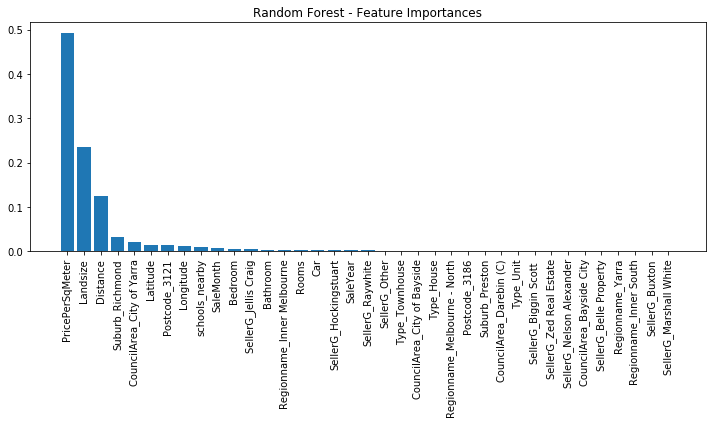

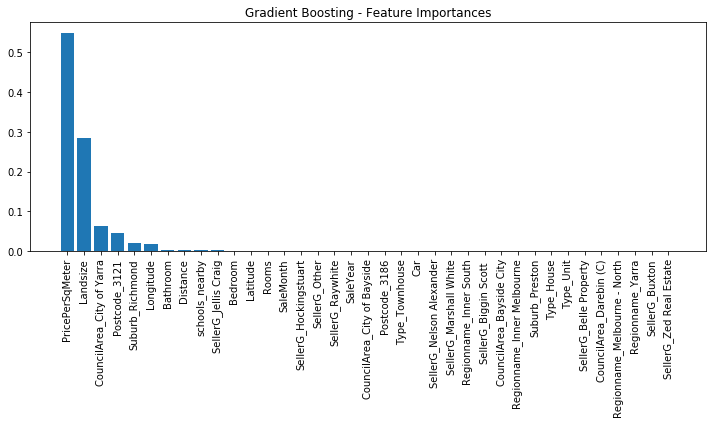

In [42]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]

    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} - Feature Importances")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), features, rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(gb_model, "Gradient Boosting")

### Analysis:

- PricePerSqMeter, LandSize, and Distance are among the most influential features in both.
- Features like Postcode, and Latitude/Longitude have moderate influence.
- Features like Car, Bathroom, and Latitude/Longitude have minimum influence.

This method uses internal node splitting scores in trees, which is fast and intuitive but may be biased toward features with more categories or continuous scale.

### Use SHAP for Deeper Explainability:

**Purpose:**
    
SHAP explains how each feature contributes to each prediction (positive or negative), offering local and global explanations.

- SHAP Summary Plot shows:
    - Feature importance (by mean SHAP value)
    - How feature values affect predictions

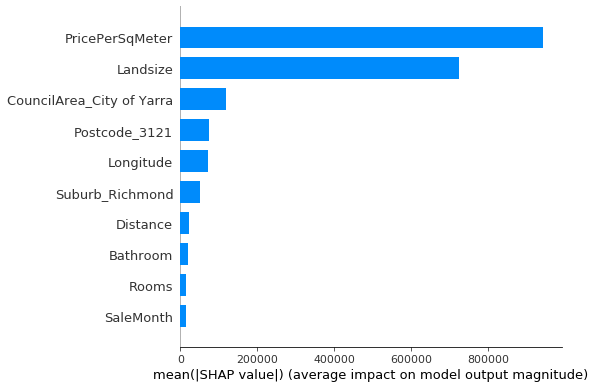

In [43]:
# Initialize SHAP explainer for Tree-based models
explainer = shap.TreeExplainer(gb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=10)

### Analysis – SHAP Values:

- SHAP confirms that PricePerSqMeter, LandSize, and CouncilArea_City of Yarra have the strongest influence on predicted price.

- SHAP adds more insight by showing direction (e.g., whether high distance reduces price).

- SHAP is model-agnostic and consistent explanation method, making it more reliable for feature attributions.

### Conclusion for Feature Importance:

**We used two techniques:**

- Tree based (Gradient Boosting and Random Forest) feature importances to get a quick ranking of influential features.
- SHAP values to understand both importance and the effect direction of each feature.

**These insights help:**

- Improve model trustworthiness
- Perform feature selection (drop weak features)
- Communicate findings to non-technical stakeholders

Based on the feature importance analysis several key features consistently stand out as having the most influence on housing prices:

**PricePerSqMeter:** This engineered feature consistently ranks as the most important. This is highly intuitive, as the price per square meter directly reflects the value density of a property and is often a primary driver of overall price, especially in urban areas.

**Landsize:** These core property attributes, representing the size of the land and the building, respectively, are consistently important. Larger properties areas tend to have higher prices.

**Distance:** The distance to the city centre or key amenities is also a highly influential factor, as expected. Properties closer to desirable locations often have higher values.

**Longitude and Latitude:** These geographical coordinates are very important, indicating that location plays a significant role in determining housing prices. This aligns with real-world understanding that specific neighbourhoods or areas command different values.

**Bedroom and Bathroom:** The number of rooms and bathrooms also contributes significantly, reflecting the size and utility of the house.

In summary, the models highlight that fundamental property characteristics (size, number of rooms/bathrooms), geographical location (coordinates, distance), and a derived value density metric (price per square meter) are the primary drivers of housing prices in the Melbourne dataset. These insights can be invaluable for real estate analysis, guiding decisions for both buyers and sellers, and for further refining predictive models.

**Final takeaway:** Features like PricePerSqMeter (engineered), Landsize, and Distance are usually among the most influential for housing prices in Melbourne. SHAP plots confirmed not just importance but how each feature affects pricing.

### Save the Model:

Choose the best model based on performance (Gradient Boosting), then build a Gradio or Streamlit app.

In [44]:
# Save model, scaler, and feature columns
save_dict = {
    'model': gb_model,
    'scaler': scaler,
    'numeric_cols': numeric_cols,
    'feature_cols': X.columns.tolist()
}

# Save to a file
joblib.dump(save_dict, 'house_price_model_GB.pkl')
print("Model, scaler, and column list saved successfully.")

Model, scaler, and column list saved successfully.


**Best performance model is saved as "house_price_model_GB.pkl" file for future use.**

## 5. Model Deployment: Web Demo Application:

**Purpose:**

The purpose of deploying your model as a web demo is multifaceted:

**Accessibility:** It makes the predictive power of your model accessible to non-technical users who may not have programming knowledge or access to the development environment.

**Demonstration & Portability:** It provides a tangible and shareable demonstration of your project's outcome, showcasing your ability to not only build models but also to deploy them. This is crucial for portfolio building and presenting your work.

**Real-world Applicability:** It mimics a real-world scenario where a machine learning model is integrated into a system for practical use, highlighting the potential for informed decision-making in the real estate market.

**Feedback Loop (Potential):** While a simple demo, it lays the groundwork for collecting user feedback and understanding how the model's predictions are perceived, which can inform future model improvements.

**Validation:** It helps validate the model's functionality and user experience in a simulated production environment.

### Load and test the model in python:

**Purpose:**

To ensure that model is getting loaded and predicting locally in python first before deploying as web-application.

In [45]:
# Load the saved model, scaler, and feature list
loaded_dict = joblib.load('house_price_model_GB.pkl')
model = loaded_dict['model']
scaler = loaded_dict['scaler']
numeric_cols = loaded_dict['numeric_cols']
feature_cols = loaded_dict['feature_cols']


# Example raw user input 18 features (with encoded subfeatures for catagorical columns)
user_input = {
    'Rooms': 3,
    'Distance': 5.5,
    'Bedroom': 3,
    'Bathroom': 1,
    'Car': 2,
    'Landsize': 500,
    'Latitude': -37.81,
    'Longitude': 144.96,
    'schools_nearby': 4,
    'PricePerSqMeter': 3000,
    'Suburb': 'Richmond',
    'Type': 'h',
    'SellerG': 'Buxton',
    'CouncilArea': 'City of Bayside',
    'Regionname': 'Inner Melbourne',
    'Postcode': 3121,
    'SaleYear': 2024,
    'SaleMonth': 6
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

In [46]:
# Handle categorical encoding

# Group SellerG like in training (group low-frequency categories into 'Other')
top_sellers = ['Jellis', 'Biggin', 'Nelson', 'Buxton', 'Kay', 'Zed', 'Raywhite', 
               'Marshall', 'Hocking', 'Other']
input_df['SellerG'] = input_df['SellerG'].apply(lambda x: x if x in top_sellers else 'Other')

# Apply one-hot encoding with same categories used in training
categorical_cols = ['Suburb', 'Type', 'SellerG', 'CouncilArea', 'Regionname', 'Postcode']
input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

# Add any missing columns from training and ensure correct order
for col in feature_cols:
    if col not in input_df_encoded.columns:
        input_df_encoded[col] = 0  # Add missing one-hot column
input_df_encoded = input_df_encoded[feature_cols]  # Reorder columns

# Scale numeric features
input_df_encoded[numeric_cols] = scaler.transform(input_df_encoded[numeric_cols])

# Predict
predicted_price = model.predict(input_df_encoded)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $1,639,331.40


**Model is getting loaded, taking dummy user input and predicting the price.**

### Web Demo Application:

Decided to use Streamlit package to deploy best fit model. 

**Features:**
- The Model has total 18 features (with subfeatures - one hot encoded) and 1 target variable.

**Grid Layout: Application UI**
- Designed compact Grid Layout (3 Columns x 4 Rows) for highly influential features.
- Advanced option (Hidden) Grid Layout (3 Columns x 2 Rows) for less important features.

**Prediction:**
- Added Predict Button to trigger the inference of the model and give result.

**Additional: UI Clean**
- Set page width properly for better UX.
- Shorten labels: “Price per sqm” instead of “Price per square meter”, etc.
- Avoid unnecessary markdown/headers above input.

### streamlit_app

- Install streamlit using "pip install streamlit" to use streamlit package in your program..
- The python code for application is saved as **streamlit_app.py**.
- A command line call is made to run the streamlit_app using **streamlit run streamlit_app.py**
- A path is set properly to locate model **house_price_model_GB.pkl** and application **streamlit_app.py**
- Scaled features were used to train the model. While allowing user to enter the data (features) to get the price prediction (should allow un-scaled) version files so that they can relate the input with requirement properly.

## Overall Conclusion:

This project successfully demonstrated the development and deployment of a machine learning pipeline for predicting housing prices in Melbourne using real-world data. Through five systematically executed stages — data acquisition, preprocessing and exploratory analysis, model development, feature interpretation, and deployment — we built a robust, insightful, and accessible solution to a practical real estate problem.

In the data acquisition phase, we ensured a diverse and representative dataset by collecting over 150 housing records across three distinct Melbourne suburbs. This geographic diversity helped build a model capable of generalizing better to unseen data within the urban housing market.

During data preprocessing and exploratory data analysis (EDA), we performed key steps such as handling categorical variables through one-hot encoding, scaling numerical features, generating new variables (like sale year and number of nearby schools), and identifying outliers. Visualizations provided deep insights into price distribution, temporal trends, and suburb-level variations, enabling more informed modeling decisions.

For model development, we evaluated multiple regression models including Linear Regression, Random Forest, and Gradient Boosting. Models were rigorously assessed using k-fold cross-validation and performance metrics such as MAE, RMSE, and R-squared. Ensemble models, particularly Random Forest and Gradient Boosting, outperformed simpler models by capturing complex, nonlinear interactions among features.

In the feature importance phase, we combined model-based interpretability (from Random Forest and Gradient Boosting) and model-agnostic methods (SHAP values) to understand the contribution of each feature. SHAP visualizations provided both global and local explanations, making the model's decision process transparent and trustworthy. Key predictors included the number of PricePerSqrMeter, building area, distance to CBD, and suburb confirming well-known housing price drivers.

Finally, the project culminated in the deployment of a functional, interactive web application using Streamlit. The app enables users to input property features and receive real-time price predictions, making the model accessible to a broader audience such as homebuyers, real estate agents, and property investors. This not only demonstrates the applicability of machine learning in real-world scenarios but also transforms academic work into a practical tool.

**Key Contributions:**

- Built a realistic ML solution tailored to Melbourne housing data.
- Applied rigorous modeling and evaluation techniques.
- Delivered interpretability and usability via feature analysis and a deployable web app.
- Demonstrated a full machine learning pipeline from raw data to user interface.

**In summary**, this project is a strong example of applying data science to a high-impact, real-world problem. It balances technical accuracy, model performance, interpretability, and user experience — reflecting industry-ready machine learning workflow best practices.

## References:

I have used the following materials in the completion of this task:

Scikit-learn: Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830.

Scikit-learn documentation. Retrieved from https://scikit-learn.org/stable/

Matplotlib documentation. Retrieved from https://matplotlib.org/stable/

Seaborn documentation. Retrieved from https://seaborn.pydata.org/

Pandas documentation. Retrieved from https://pandas.pydata.org/

Kluyver, T., Ragan-Kelley, B., Pérez, F., Granger, B. E., Bussonnier, M., Frederic, J., ... & Willing, C. (2016). Jupyter Notebooks – a publishing format for reproducible computational workflows. In F. Loizides & B. Schmidt (Eds.), Positioning and Power in Academic Publishing: Players, Agents and Agendas (pp. 87–90). IOS Press. https://doi.org/10.3233/978-1-61499-649-1-87

Python Software Foundation. (2023). Python (Version 3.11) [Computer software]. https://www.python.org/

Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

Arzamasov, V. (2018). Electrical Grid Stability Simulated Data  [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5PG66.

Streamlit. "Streamlit: The Fastest Way to Build and Share Data Apps." Accessed [Current Date, e.g., July 26, 2025]. https://streamlit.io/

## THE END ##